In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
sys.path.insert(0, "../scripts")
from utils import load_data  
from vae import VAE

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from tensorflow import keras

from tensorflow.keras.models import Model, Sequential
import seaborn
import random as python_random
import tensorflow as tf

output_dir = pathlib.Path("../data")
output_dir.mkdir(exist_ok=True)

import pyreadr

from sklearn.decomposition import PCA

In [ ]:
# Load the data
data_splits = ["train", "test", "valid"]
data_dict = load_data(data_splits, dataset = "recount3_sample")



In [ ]:
# Prepare the data for training
train_features_df = data_dict["train"]
test_features_df = data_dict["test"]
valid_features_df = data_dict["valid"]
#complete_features_df = data_dict["complete"]


In [ ]:
train_features_df.shape

In [ ]:
# Set Architecture
encoder_architecture = [2500]
decoder_architecture = [2500]

In [ ]:
gic_vae = VAE(
    input_dim=train_features_df.shape[1],
    latent_dim=90,
    batch_size=1024,
    encoder_batch_norm=True,
    epochs=40,
    learning_rate=1e-3,
    encoder_architecture=encoder_architecture,
    decoder_architecture=decoder_architecture,
    beta=1,
    #lam=10000000,
    verbose=True,
)

gic_vae.compile_vae()


In [ ]:
gic_vae.train(x_train=train_features_df, x_test=valid_features_df)

In [30]:
gic_vae.vae

In [31]:
history_df = pd.DataFrame(gic_vae.vae.history.history)
history_df

,loss,recon,kl,mmd,val_loss,val_recon,val_kl,val_mmd
0,485.296692,455.549042,29.747660,0.0,1305.303223,1145.624756,159.678329,0.0
1,318.941467,293.466644,25.474798,0.0,562.307617,496.940399,65.367172,0.0
2,287.739105,263.503510,24.235640,0.0,424.562103,376.973419,47.588631,0.0
3,270.666412,247.235825,23.430595,0.0,329.197968,291.329437,37.868565,0.0
4,261.968903,239.369766,22.599123,0.0,295.027802,259.935852,35.091942,0.0
5,256.551849,234.290024,22.261799,0.0,292.378967,258.261322,34.117649,0.0
6,252.876465,230.860428,22.016058,0.0,277.435059,246.294540,31.140522,0.0
7,249.398361,228.008865,21.389475,0.0,260.302673,233.247772,27.054888,0.0
8,246.128418,225.052444,21.075970,0.0,253.201141,228.325577,24.875557,0.0
9,243.723236,223.098495,20.624704,0.0,253.041336,226.928558,26.112780,0.0


In [32]:
gic_vae.vae.evaluate(test_features_df)

78/78 [==============================] - 3s 40ms/step - loss: 230.8371 - recon: 213.4316 - kl: 17.4055 - mmd: 0.0000e+00


[230.83705139160156, 213.4315643310547, 17.405515670776367, 0.0]

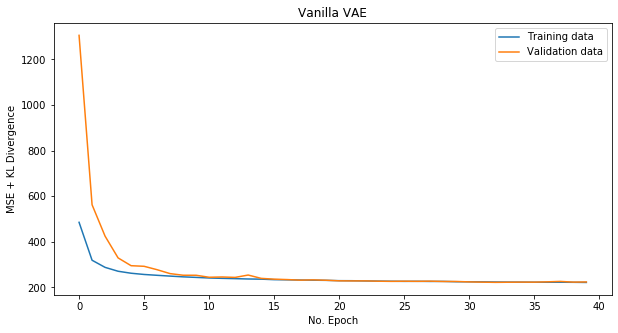

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(history_df["loss"], label="Training data")
plt.plot(history_df["val_loss"], label="Validation data")
plt.ylabel("MSE + KL Divergence")
plt.xlabel("No. Epoch")
plt.title("Vanilla VAE")
plt.legend()
#plt.show()
plt.savefig('Vanilla_VAE.png')

In [34]:
reconstruction = pd.DataFrame(
    gic_vae.vae.predict(test_features_df))
(sum(sum((np.array(test_features_df) - np.array(reconstruction)) ** 2))) ** 0.5

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


728.9975641603501

In [35]:
decoder = gic_vae.decoder_block["decoder"]


In [36]:
encoder = gic_vae.encoder_block["encoder"]


In [56]:
# encoder.save_weights("../models/vanilla_encoder_weights.h5")
# encoder.save("../models/vanilla_encoder_model.h5")
decoder.save_weights("../models/vanilla_decoder_weights.h5")
# decoder.save("../models/vanilla_decoder_model.h5")

In [38]:
# Load the full data
data_splits = ["complete"]
data_dict = load_data(data_splits, dataset = "recount3_sample")


In [39]:
complete_features_df = data_dict["complete"]

In [46]:
latent_complete = np.array(encoder.predict(complete_features_df)[2])
latent_df = pd.DataFrame(latent_complete)
latent_df.to_csv("../data/latentTwoLayer_vanilla.csv")

In [41]:
# import pickle
# with open("full_data_scaler.pkl", "rb") as scaler_fh:
#         scaler = pickle.load(scaler_fh)


In [43]:
pca = PCA(n_components = 2)

In [45]:
pca_full= pd.DataFrame(pca.fit_transform(complete_features_df))

In [47]:
reconstruction = pd.DataFrame(gic_vae.vae.predict(complete_features_df))

In [69]:
pca_reconstruction = pd.DataFrame(pca.transform(reconstruction))
type(pca_reconstruction)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


pandas.core.frame.DataFrame

In [71]:
mmd_pca = pd.read_csv("../data/mmd_reconstruction_pca.csv", index_col = 0)
mmd_pca.head()
mmd_pca.columns.values

array(['0', '1'], dtype=object)

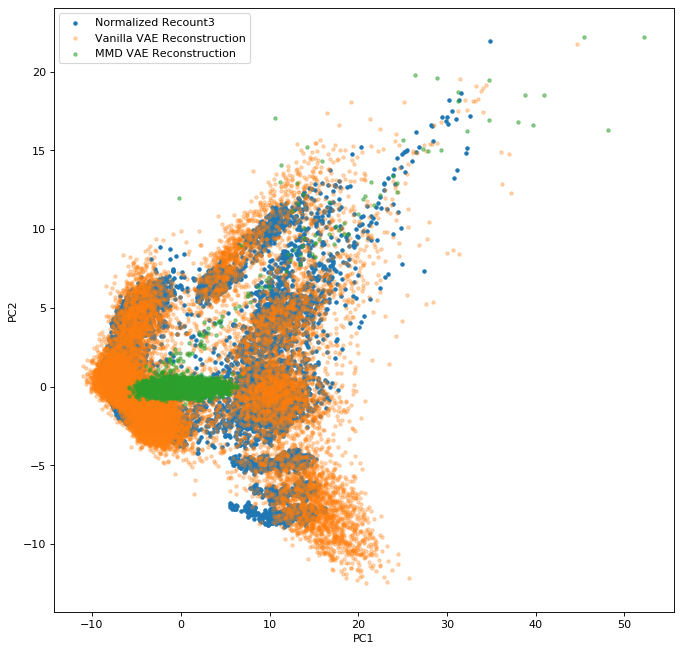

In [77]:
figure(figsize=(10, 10), dpi=80)
plt.scatter(pca_full[0],pca_full[1], marker = ".", alpha = 1, label = "Normalized Recount3")
plt.scatter(pca_reconstruction[0],pca_reconstruction[1], marker = ".", alpha = 0.3, label = "Vanilla VAE Reconstruction")
plt.scatter(mmd_pca['0'],mmd_pca['1'], marker = ".", alpha = 0.5, label = "MMD VAE Reconstruction")
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.legend()
plt.savefig("PCA_plot.png")